#DESAFIO: TRANSFORMAR BASE DE DADOS TEXTUAIS EM UMA MATRIZ

#Autora: Carla Edila Santos da Rosa Silveira
#Data: 27/11/2021
____________________________________________________________________
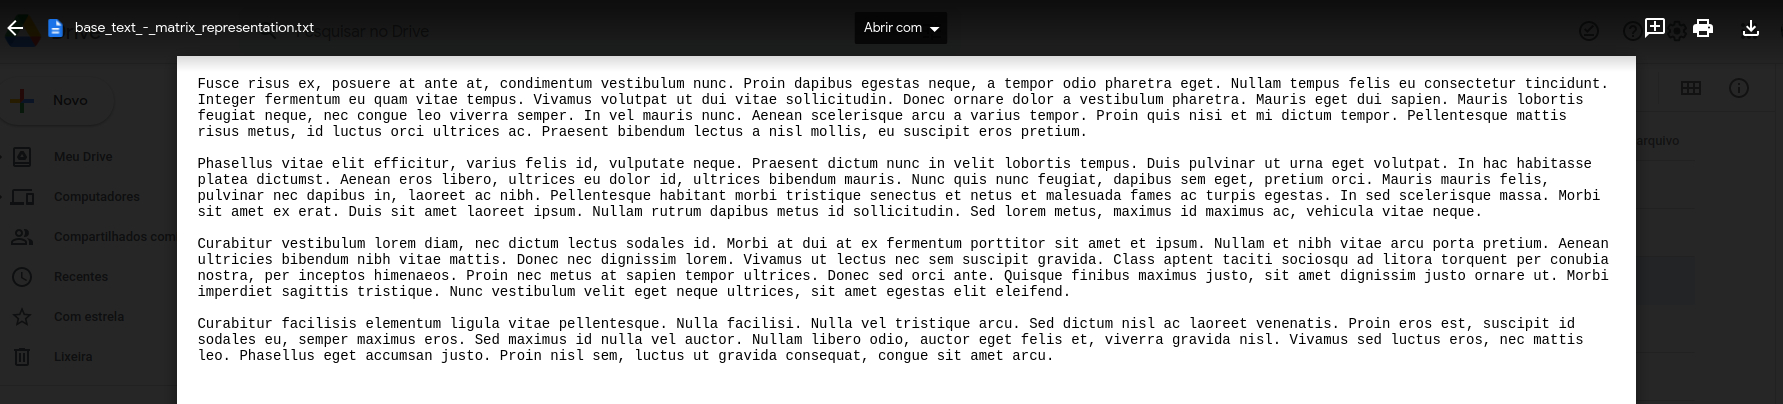



###Montagem de Google Drive integrado ao Colab

In [13]:
from google.colab import drive  #importa bilbioteca Drive
drive.mount('/content/drive')  #carrega Drive no Colab e pede acesso à conta Google

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Leitura do arquivo de texto base do desafio

In [14]:
arq_base = open("/content/drive/MyDrive/arquivos_txt/base_text_-_matrix_representation.txt", "r") 
#usado parâmetro "r" para leitura do arquivo
arq_lido = arq_base.read() #criada variavel para receber leitura
print(arq_lido) #imprime conteudo da variavel
arq_base.close() #fechamento do arquivo
#mostra conteúdo de arq_base, dividido em 4 parágrafos como consta na fonte original

Fusce risus ex, posuere at ante at, condimentum vestibulum nunc. Proin dapibus egestas neque, a tempor odio pharetra eget. Nullam tempus felis eu consectetur tincidunt. Integer fermentum eu quam vitae tempus. Vivamus volutpat ut dui vitae sollicitudin. Donec ornare dolor a vestibulum pharetra. Mauris eget dui sapien. Mauris lobortis feugiat neque, nec congue leo viverra semper. In vel mauris nunc. Aenean scelerisque arcu a varius tempor. Proin quis nisi et mi dictum tempor. Pellentesque mattis risus metus, id luctus orci ultrices ac. Praesent bibendum lectus a nisl mollis, eu suscipit eros pretium.

Phasellus vitae elit efficitur, varius felis id, vulputate neque. Praesent dictum nunc in velit lobortis tempus. Duis pulvinar ut urna eget volutpat. In hac habitasse platea dictumst. Aenean eros libero, ultrices eu dolor id, ultrices bibendum mauris. Nunc quis nunc feugiat, dapibus sem eget, pretium orci. Mauris mauris felis, pulvinar nec dapibus in, laoreet ac nibh. Pellentesque habitant 

###Instalação de pacotes para leitura de planilhas Google

In [ ]:
#Gspread possibilita a interação entre código Python e planilhas do Google
!pip install --upgrade gspread #instala a última versão da API Gspread  
!pip install gspread-dataframe==2.1.0 #instala pacote de quadro de dados    

###Criação de ambiente integrado com Google Colab


In [19]:
#from google.colab import auth  #importa pacote de autenticação do Google Colab
#auth.authenticate_user()

#import gspread #importa biblioteca Gspread
#from oauth2client.client import GoogleCredentials #importa pacote de credenciais do Google

#gc = gspread.authorize(GoogleCredentials.get_application_default())  #pede autorização para acessar conta Google
#fazer login por meio de link fornecido durante a execução do código para abrir no navegador

from google.colab import auth  #importa pacote de autenticação do Google Colab
auth.authenticate_user()

import gspread  #importa biblioteca Gspread
from google.auth import default  #importa pacote de credenciais do Google
creds, _ = default()

gc = gspread.authorize(creds)  #pede autorização para acessar conta Google
#fazer login por meio de link fornecido durante a execução do código para abrir no navegador

###Instalação de pacotes Pandas e API OpenDocument para Python 

In [ ]:
!pip install pandas  #pacote para auxiliar na leitura de planilhas no Drive e convertê-las em Pandas formato de quadro de dados

In [ ]:
!pip install odfpy #instala pacote do OpenDocument para Python

###Leitura do arquivo de texto no formato de planilha do OpenDocument

In [22]:
import pandas as pd #importa biblioteca Pandas
df = pd.read_excel('/content/drive/MyDrive/Desafio1_IA/matrix1.ods', engine='odf') #leitura do arquivo com texto transposto para planilha ODS do OpenDocument 
df #mostra planilha com todas as palavras de cada parágrafo, optou-se pela exclusão da pontuação para simplificar a organização dos dados na planilha.

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,Fusce,risus,ex,posuere,at,ante,at,condimentum,vestibulum,nunc,...,suscipit,eros,pretium,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Phasellus,vitae,elit,efficitur,varius,felis,id,vulputate,neque,Praesent,...,Sed,lorem,metus,maximus,id,maximus,ac,vehicula,vitae,neque
2,Curabitur,vestibulum,lorem,diam,nec,dictum,lectus,sodales,id,Morbi,...,amet,egestas,elit,eleifend,NaN,NaN,NaN,NaN,NaN,NaN
3,Curabitur,facilisis,elementum,ligula,vitae,pellentesque,Nulla,facilisi,Nulla,vel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### OBSERVAÇÃO: A planilha text_matrix1 poderia representar uma matriz composta por 4 linhas (os vetores corresponderiam aos parágrafos do texto) e 99 colunas (obtidas pela contagem total de palavras do 2º parágrafo, que é o de maior extensão), desde que fossem preenchidas as colunas com valores ausentes para viabilizar a etapa exploratória de dados. Os dados poderão ser manipulados como se estivessem numa matriz, como será exemplificado mais adiante.

In [23]:
df.info() #aplicado método info() para detectar dados ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       4 non-null      object
 1   2       4 non-null      object
 2   3       4 non-null      object
 3   4       4 non-null      object
 4   5       4 non-null      object
 5   6       4 non-null      object
 6   7       4 non-null      object
 7   8       4 non-null      object
 8   9       4 non-null      object
 9   10      4 non-null      object
 10  11      4 non-null      object
 11  12      4 non-null      object
 12  13      4 non-null      object
 13  14      4 non-null      object
 14  15      4 non-null      object
 15  16      4 non-null      object
 16  17      4 non-null      object
 17  18      4 non-null      object
 18  19      4 non-null      object
 19  20      4 non-null      object
 20  21      4 non-null      object
 21  22      4 non-null      object
 22  23      4 non-null      object

###### OBSERVAÇÃO: Verifica-se que da coluna 67 até 99 ou no intervalo das células BO1:CU5 há dados ausentes na planilha.

In [24]:
df1 = df.fillna(value=0) #substituição de todos os valores NaN por 0
df1 #mostra a versão da planilha sem dados ausentes

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,Fusce,risus,ex,posuere,at,ante,at,condimentum,vestibulum,nunc,...,suscipit,eros,pretium,0,0,0,0,0,0,0
1,Phasellus,vitae,elit,efficitur,varius,felis,id,vulputate,neque,Praesent,...,Sed,lorem,metus,maximus,id,maximus,ac,vehicula,vitae,neque
2,Curabitur,vestibulum,lorem,diam,nec,dictum,lectus,sodales,id,Morbi,...,amet,egestas,elit,eleifend,0,0,0,0,0,0
3,Curabitur,facilisis,elementum,ligula,vitae,pellentesque,Nulla,facilisi,Nulla,vel,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df1.info() #conferência de valores ausentes após manipulação da planilha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       4 non-null      object
 1   2       4 non-null      object
 2   3       4 non-null      object
 3   4       4 non-null      object
 4   5       4 non-null      object
 5   6       4 non-null      object
 6   7       4 non-null      object
 7   8       4 non-null      object
 8   9       4 non-null      object
 9   10      4 non-null      object
 10  11      4 non-null      object
 11  12      4 non-null      object
 12  13      4 non-null      object
 13  14      4 non-null      object
 14  15      4 non-null      object
 15  16      4 non-null      object
 16  17      4 non-null      object
 17  18      4 non-null      object
 18  19      4 non-null      object
 19  20      4 non-null      object
 20  21      4 non-null      object
 21  22      4 non-null      object
 22  23      4 non-null      object

###Manipulação de planilha em formato do Google Sheet

In [26]:
spreadsheet = gc.open('text_matrix') #abertura da planilha armazenada em formato gsheet

In [27]:
page = spreadsheet.sheet1 #abertura da primeira aba ou folha da planilha

In [28]:
page.col_values(1) #mostra dados da 1a. coluna

['1', 'Fusce', 'Phasellus', 'Curabitur', 'Curabitur']

In [29]:
page.row_values(5) #mostra dados da linha 5 da planilha 

['Curabitur',
 'facilisis',
 'elementum',
 'ligula',
 'vitae',
 'pellentesque',
 'Nulla',
 'facilisi',
 'Nulla',
 'vel',
 'tristique',
 'arcu',
 'Sed',
 'dictum',
 'nisl',
 'ac',
 'laoreet',
 'venenatis',
 'Proin',
 'eros',
 'est',
 'suscipit',
 'id',
 'sodales',
 'eu',
 'semper',
 'maximus',
 'eros',
 'Sed',
 'maximus',
 'id',
 'nulla',
 'vel',
 'auctor',
 'Nullam',
 'libero',
 'odio',
 'auctor',
 'eget',
 'felis',
 'et',
 'viverra',
 'gravida',
 'nisl',
 'Vivamus',
 'sed',
 'luctus',
 'eros',
 'nec',
 'mattis',
 'leo',
 'Phasellus',
 'eget',
 'accumsan',
 'justo',
 'Proin',
 'nisl',
 'sem',
 'luctus',
 'ut',
 'gravida',
 'consequat',
 'congue',
 'sit',
 'amet',
 'arcu']

In [30]:
page.acell('A3').value  #mostra o valor inserido na célula A3

'Phasellus'

In [31]:
page.cell(3,1).value #mostra dado de uma célula como se fosse uma matriz, localizado na linha 3 e coluna 1 

'Phasellus'

In [32]:
#impressao de dados localizados na planilha como se estivessem em uma matriz
print(page.cell(2,11).value) #linha 2 e coluna 11
print(page.cell(3,1).value) #linha 3 e coluna 1
print(page.cell(4,7).value) #linha 4 e coluna 7
print(page.cell(5,6).value) #linha 5 e coluna 6

Proin
Phasellus
lectus
pellentesque


###Transformação de texto em matriz 


###### A transformação dos dados foram feitas em planilhas do OpenDocument, que em seguida serão manipuladas minimamente com pacote Pandas no ambiente do Google Colab. Escolheu-se a técnica Bag of Words (BoW), adotada em projetos de Priocessamento de Linguagem Natural (PLN), como primeira opção simplificada para transformar um texto em dados numéricos, os quais compõem uma matriz binária que indica a presença das palavras no texto, desconsiderando a gramaticalidade e ordenação sintática das palavras. <br/> Modelou-se um vetor em que as colunas são preenchidas pelo conjunto de palavras não repetidas do texto e as linhas contém o conjunto de todas as palavras contidas em cada parágrafo do texto, como demostrado acima na "Leitura do arquivo de texto base do desafio". As linhas contém valores atribuídos para presença ( = 1) ou ausência ( = 0) da palavra no parágrafo. <br/> Os sinais de pontuação foram descartados manualmente, não há diferenciação entre letras maiúscula e minúscula no tratamento das palavras; não houve agrupamento de palavras com radical semelhante por se tratar de texto Lorem Ipsum que, embora tenha base no latim, não é latim propriamente dito. Assim, evita-se gerar uma lematização com resultado truncado, seja feita de modo manual ou por meio do pacote The Natural Language Toolkit (NLTK).  

In [66]:
df = pd.read_excel('/content/drive/MyDrive/Desafio1_IA/contagem.ods', engine='odf') #leitura do arquivo com contagem de palavras do texto 
df #mostra planilha com palavras não repetidas do texto

,Palavra,Contagem
0,a,1
1,ac,2
2,accumsan,3
3,ad,4
4,Aenean,5
...,...,...
137,vitae,138
138,Vivamus,139
139,viverra,140
140,volutpat,141


In [68]:
df = pd.read_excel('/content/drive/MyDrive/Desafio1_IA/matrix4.ods', engine='odf') #leitura do arquivo para criação de matriz binária 
df #mostra planilha com todas as palavras presentes em cada parágrafo, ainda sem a atribuição de valor para dados ausentes

,Parágrafos x Palavras,a,ac,accumsan,ad,Aenean,amet,ante,aptent,arcu,...,vehicula,vel,velit,venenatis,vestibulum,vitae,Vivamus,viverra,volutpat,vulputate
0,Parágrafo 1,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,...,NaN,1.0,NaN,NaN,1.0,1,1.0,1.0,1.0,NaN
1,Parágrafo 2,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,1,NaN,NaN,1.0,1.0
2,Parágrafo 3,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,1.0,1,1.0,NaN,NaN,NaN
3,Parágrafo 4,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,1.0,NaN,1.0,NaN,1,1.0,1.0,NaN,NaN


In [67]:
df2 = df.fillna(value=0) #substituição de todos os valores NaN por 0
df2 #mostra versão da planilha com dados dispostos em matriz binária 4 x 142 

,Palavra,Contagem
0,a,1
1,ac,2
2,accumsan,3
3,ad,4
4,Aenean,5
...,...,...
137,vitae,138
138,Vivamus,139
139,viverra,140
140,volutpat,141


######OBSERVAÇÃO: Neste caso, gerou-se um vetor esparso, que possui grande quantidade de valores igual a zero. Esta opção pode dificultar as análises dos dados, porque o vetor esparso exige mais memória e recursos computacionais na sua modelagem.

In [36]:
df = pd.read_excel('/content/drive/MyDrive/Desafio1_IA/matrix5.ods', engine='odf') #leitura do arquivo para criação da matriz de frequências  
pd.set_option('display.precision', 0) #formata exibição de nros sem casas decimais
df #mostra planilha com frequência das palavras em cada parágrafo, sem atribuir valores para dados ausentes

,Parágrafos x Palavras,a,ac,accumsan,ad,Aenean,amet,ante,aptent,arcu,...,vehicula,vel,velit,venenatis,vestibulum,vitae,Vivamus,viverra,volutpat,vulputate
0,Parágrafo 1,4,1,NaN,NaN,1,NaN,1,NaN,1,...,NaN,1,NaN,NaN,2,2,1,1,1,NaN
1,Parágrafo 2,NaN,3,NaN,NaN,1,2,NaN,NaN,NaN,...,1,NaN,1,NaN,NaN,2,NaN,NaN,1,1
2,Parágrafo 3,NaN,NaN,NaN,1,1,3,1,1,1,...,NaN,NaN,1,NaN,2,2,1,NaN,NaN,NaN
3,Parágrafo 4,NaN,1,1,NaN,NaN,1,NaN,NaN,2,...,NaN,2,NaN,1,NaN,1,1,1,NaN,NaN


In [70]:
df3 = df.fillna(value=0) #substituição dos valores NaN por 0
df3 #mostra versão da planilha com dados dispostos em matriz de frequência 4 x 142 

,Parágrafos x Palavras,a,ac,accumsan,ad,Aenean,amet,ante,aptent,arcu,...,vehicula,vel,velit,venenatis,vestibulum,vitae,Vivamus,viverra,volutpat,vulputate
0,Parágrafo 1 (92),0.02618,0.00136,0.00000,0.00000,0.00136,0.00000,0.00327,0.00000,0.00136,...,0.00000,0.00327,0.00000,0.00000,0.00654,0.00000,0.00136,0.00327,0.00327,0.00000
1,Parágrafo 2 (99),0.00000,0.00379,0.00000,0.00000,0.00126,0.00252,0.00000,0.00000,0.00000,...,0.00608,0.00000,0.00304,0.00000,0.00000,0.00252,0.00000,0.00000,0.00304,0.00608
2,Parágrafo 3 (93),0.00000,0.00000,0.00000,0.00647,0.00134,0.00403,0.00324,0.00647,0.00134,...,0.00000,0.00000,0.00324,0.00000,0.00647,0.00134,0.00324,0.00000,0.00000,0.00000
3,Parágrafo 4 (66),0.00000,0.00136,0.00654,0.00000,0.00000,0.00136,0.00000,0.00000,0.00272,...,0.00000,0.00912,0.00000,0.00912,0.00000,0.00189,0.00189,0.00456,0.00000,0.00000


In [69]:
df = pd.read_excel('/content/drive/MyDrive/Desafio1_IA/matrix6.ods', engine='odf') #leitura do arquivo com tratamento estatístico TF-IDF  
pd.set_option('display.precision', 5) #formata quantidade de casas decimais a exibir no dataframe
df #mostra matriz com pontuação de frequências: TF (frequência da palavra) x TDF (frequência invertida nos documentos) 

,Parágrafos x Palavras,a,ac,accumsan,ad,Aenean,amet,ante,aptent,arcu,...,vehicula,vel,velit,venenatis,vestibulum,vitae,Vivamus,viverra,volutpat,vulputate
0,Parágrafo 1 (92),0.02618,0.00136,0.00000,0.00000,0.00136,0.00000,0.00327,0.00000,0.00136,...,0.00000,0.00327,0.00000,0.00000,0.00654,0.00000,0.00136,0.00327,0.00327,0.00000
1,Parágrafo 2 (99),0.00000,0.00379,0.00000,0.00000,0.00126,0.00252,0.00000,0.00000,0.00000,...,0.00608,0.00000,0.00304,0.00000,0.00000,0.00252,0.00000,0.00000,0.00304,0.00608
2,Parágrafo 3 (93),0.00000,0.00000,0.00000,0.00647,0.00134,0.00403,0.00324,0.00647,0.00134,...,0.00000,0.00000,0.00324,0.00000,0.00647,0.00134,0.00324,0.00000,0.00000,0.00000
3,Parágrafo 4 (66),0.00000,0.00136,0.00654,0.00000,0.00000,0.00136,0.00000,0.00000,0.00272,...,0.00000,0.00912,0.00000,0.00912,0.00000,0.00189,0.00189,0.00456,0.00000,0.00000


######OBSERVAÇÃO: A pontuação TF-IDF é zerada se a palavra aparecer em todos os documentos, como ocorre com: "dictum", "eget", "et", "ut" etc. Para calcular a pontuação, aplicou-se na planilha matrix6 a seguinte fórmula: ((frequência da palavra no documento/nº de palavras do documento) x log(nº total de documentos/nº de documentos com a palavra)). Assumiu-se que cada parágrafo representava um documento. A matriz de pontuação de frequências pode ser utilizada em modelos de ML. 

In [ ]:
spreadsheet = gc.open('matrix') #abertura da planilha armazenada em formato gsheet

In [62]:
page = spreadsheet.sheet1 #abertura da primeira aba ou folha da planilha

In [60]:
#Matriz4 = pd.DataFrame(page.get_all_records())

#worksheets = spreadsheet.worksheets()
values = []
for ws in worksheets:
    values.extend(page.get_all_values())
Matriz4 = pd.DataFrame(values)
print(Matriz4)

                                                  0   1   2         3   4    \
0   MATRIZ DE FREQUÊNCIA DAS PALAVRAS NO TEXTO – P...                         
1                               Parágrafos x Palavras   a  ac  accumsan  ad   
2                                         Parágrafo 1   4   1                 
3                                         Parágrafo 2       3                 
4                                         Parágrafo 3                     1   
5                                         Parágrafo 4       1         1       
6   MATRIZ DE FREQUÊNCIA DAS PALAVRAS NO TEXTO – P...                         
7                               Parágrafos x Palavras   a  ac  accumsan  ad   
8                                         Parágrafo 1   4   1                 
9                                         Parágrafo 2       3                 
10                                        Parágrafo 3                     1   
11                                        Parágrafo 

In [65]:
Matriz4.head(12)

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
0,MATRIZ DE FREQUÊNCIA DAS PALAVRAS NO TEXTO – P...,,,,,,,,,,...,,,,,,,,,,
1,Parágrafos x Palavras,a,ac,accumsan,ad,Aeneam,amet,ante,aptent,arcu,...,vehicula,vel,velit,venenatis,vestibulum,vitae,Vivamus,viverra,volutpat,vulputate
2,Parágrafo 1,4,1,,,1,,1,,1,...,,1,,,2,2,1,1,1,
3,Parágrafo 2,,3,,,1,2,,,,...,1,,1,,,2,,,1,1
4,Parágrafo 3,,,,1,1,3,1,1,1,...,,,1,,2,2,1,,,
5,Parágrafo 4,,1,1,,,1,,,2,...,,2,,1,,1,1,1,,
6,MATRIZ DE FREQUÊNCIA DAS PALAVRAS NO TEXTO – P...,,,,,,,,,,...,,,,,,,,,,
7,Parágrafos x Palavras,a,ac,accumsan,ad,Aeneam,amet,ante,aptent,arcu,...,vehicula,vel,velit,venenatis,vestibulum,vitae,Vivamus,viverra,volutpat,vulputate
8,Parágrafo 1,4,1,,,1,,1,,1,...,,1,,,2,2,1,1,1,
9,Parágrafo 2,,3,,,1,2,,,,...,1,,1,,,2,,,1,1
